IMPORTAÇÕES

In [4]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

PLANILHAS

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

focos_mensal_dados = pd.read_csv("dados/focos_mensal_br_202406.csv")
display(focos_mensal_dados)

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp
0,9a3beb77-47d0-3372-859b-674c3ad12e6e,-11.1900,-53.8100,2024-06-01 00:04:22,MSG-03,MARCELÂNDIA,MATO GROSSO,Brasil,5105580,51,33,34,0.0,0.39,Amazônia,NaN
1,6060a777-88d5-3ef7-bb08-cc2e9ad8c6db,-11.1523,-54.3104,2024-06-01 00:06:07,GOES-16,MARCELÂNDIA,MATO GROSSO,Brasil,5105580,51,33,34,0.0,0.36,Amazônia,101.0
2,f6241985-6055-34b5-b198-217e365d77df,-11.2151,-53.8125,2024-06-01 00:06:08,GOES-16,MARCELÂNDIA,MATO GROSSO,Brasil,5105580,51,33,34,0.0,0.40,Amazônia,358.9
3,d8fa8528-59fb-3017-8acf-6303115633b7,-11.1959,-53.8348,2024-06-01 00:06:08,GOES-16,MARCELÂNDIA,MATO GROSSO,Brasil,5105580,51,33,34,0.0,0.40,Amazônia,50.5
4,d2946224-4114-3191-87fb-a78feeb0e6d6,-11.1962,-53.8142,2024-06-01 00:06:08,GOES-16,MARCELÂNDIA,MATO GROSSO,Brasil,5105580,51,33,34,0.0,0.40,Amazônia,87.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353038,feb4f53b-e202-350c-8f74-7f82fc40cb1d,-19.6805,-57.0351,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,62,0.0,0.84,Pantanal,106.4
353039,7fcb2a72-dd94-33e5-b249-69de261a3faf,-19.6801,-57.0561,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.0,0.94,Pantanal,60.7
353040,7d66733d-24fd-3205-967d-17dc67e60fd2,-20.0190,-42.8786,2024-06-30 23:36:57,GOES-16,SÃO DOMINGOS DO PRATA,MINAS GERAIS,Brasil,3161007,31,33,88,0.0,1.00,Mata Atlântica,86.7
353041,defe4e3a-b07b-30a1-9a9c-9e3403ab2967,-19.6604,-57.0379,2024-06-30 23:36:57,GOES-16,CORUMBÁ,MATO GROSSO DO SUL,Brasil,5003207,50,33,60,0.0,0.89,Pantanal,68.3


MONTANDO OS DADOS PARA UTILIZAR NOS GRÁFICOS

In [6]:
#                                     -------------------------------------------NORDESTE-------------------------------------------

risco_fogo = focos_mensal_dados[['risco_fogo','municipio','estado']]

estados_nordeste = ['ALAGOAS', 'BAHIA', 'CEARÁ', 'MARANHÃO', 'PARAÍBA', 'PERNAMBUCO', 'PIAUÍ', 'RIO GRANDE DO NORTE', 'SERGIPE']

nordeste_municipios = focos_mensal_dados[focos_mensal_dados['estado'].isin(estados_nordeste)][['risco_fogo','estado','municipio']]

nordeste_municipios_risco_fogo = nordeste_municipios.sort_values(by='risco_fogo', ascending=False)

# display(nordeste_municipios.describe())
# display(nordeste_municipios_risco_fogo.head(10))

media_risco_estado_nordeste = nordeste_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_nordeste.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_nordeste.head(10))

#                                     -------------------------------------------NORTE----------------------------------------------

risco_fogo = focos_mensal_dados[['risco_fogo','municipio','estado']]

estados_norte = ['ACRE', 'AMAPÁ', 'AMAZONAS', 'PARÁ', 'RONDÔNIA', 'RORAIMA', 'TOCANTINS']

norte_municipios = focos_mensal_dados[focos_mensal_dados['estado'].isin(estados_norte)][['risco_fogo','estado','municipio']]

norte_municipios_risco_fogo = norte_municipios.sort_values(by='risco_fogo', ascending=False)

# display(norte_municipios.describe())
# display(norte_municipios_risco_fogo.head(10))

media_risco_estado_norte = norte_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_norte.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_norte.head(10))

#                                     -------------------------------------------CENTRO-OESTE---------------------------------------

risco_fogo = focos_mensal_dados[['risco_fogo','municipio','estado']]

estados_centro = ['GOIÁS', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'DISTRITO FEDERAL']

centro_municipios = focos_mensal_dados[focos_mensal_dados['estado'].isin(estados_centro)][['risco_fogo','estado','municipio']]

centro_municipios_risco_fogo = centro_municipios.sort_values(by='risco_fogo', ascending=False)

# display(centro_municipios.describe())
# display(centro_municipios_risco_fogo.head(10))

media_risco_estado_centro = centro_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_centro.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_centro.head(10))

#                                     -------------------------------------------SUDESTE--------------------------------------------

risco_fogo = focos_mensal_dados[['risco_fogo','municipio','estado']]

estados_sudeste = ['MINAS GERAIS', 'SÃO PAULO', 'RIO DE JANEIRO', 'ESPÍRITO SANTO']

sudeste_municipios = focos_mensal_dados[focos_mensal_dados['estado'].isin(estados_sudeste)][['risco_fogo','estado','municipio']]

sudeste_municipios_risco_fogo = sudeste_municipios.sort_values(by='risco_fogo', ascending=False)

# display(sudeste_municipios.describe())
# display(sudeste_municipios_risco_fogo.head(10))

media_risco_estado_sudeste = sudeste_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_sudeste.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_sudeste.head(10))

# SUDESTE

#                                     -------------------------------------------SUL------------------------------------------------

risco_fogo = focos_mensal_dados[['risco_fogo','municipio','estado']]

estados_sul = ['PARANÁ', 'SANTA CATARINA', 'RIO GRANDE DO SUL']

sul_municipios = focos_mensal_dados[focos_mensal_dados['estado'].isin(estados_sul)][['risco_fogo','estado','municipio']]

sul_municipios_risco_fogo = sul_municipios.sort_values(by='risco_fogo', ascending=False)

# display(sul_municipios.describe())
# display(sul_municipios_risco_fogo.head(10))

media_risco_estado_sul = sul_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_sul.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_sul.head(10))

# SUL

TRANSFORMANDO EM GRÁFICOS(SUL)

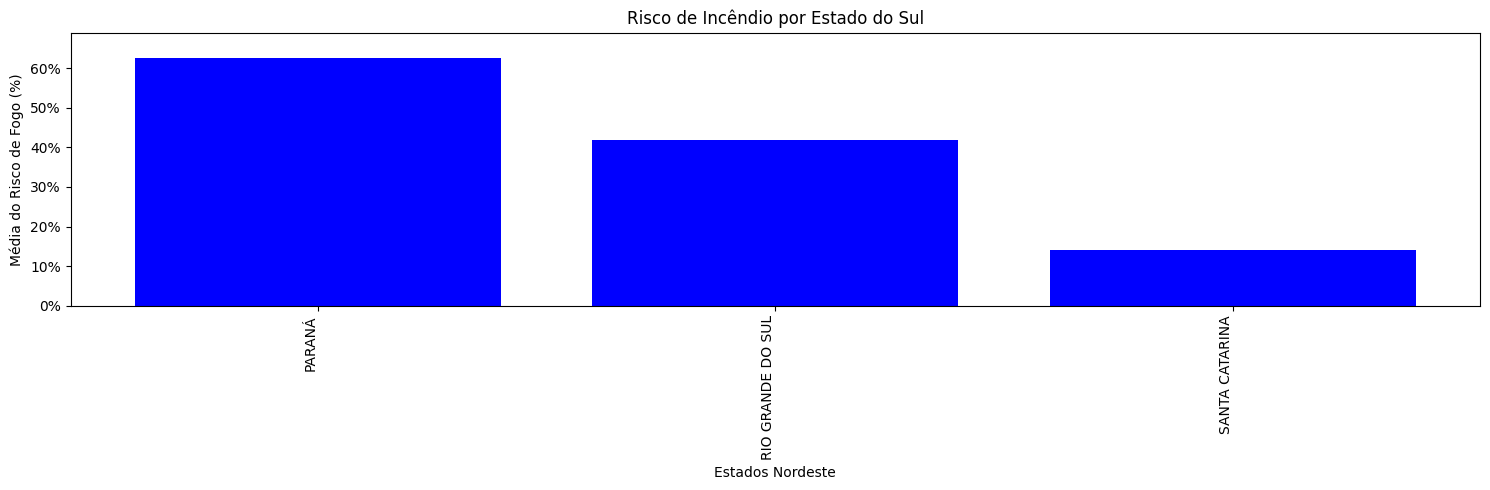

In [54]:
# Calcular a média do risco de fogo por estado
media_risco_estado = sul_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 1

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Sul')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo (%)')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, media_risco_estado['risco_fogo'].max() * 1.1)  # Um pouco acima do máximo para espaço

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

TRANSFORMANDO EM GRÁFICOS(SUDESTE)

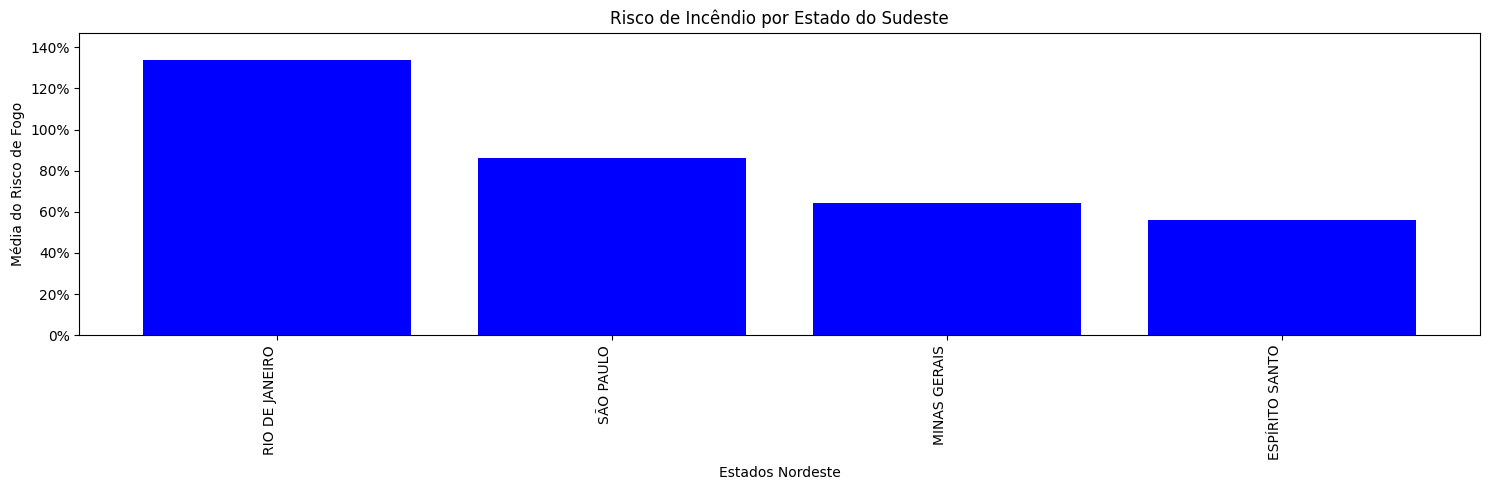

In [56]:
# Calcular a média do risco de fogo por estado
media_risco_estado = sudeste_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 1

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Sudeste')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, media_risco_estado['risco_fogo'].max() * 1.1)  # Um pouco acima do máximo para espaço

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


TRANSFORMANDO EM GRÁFICOS(CENTRO-OESTE)

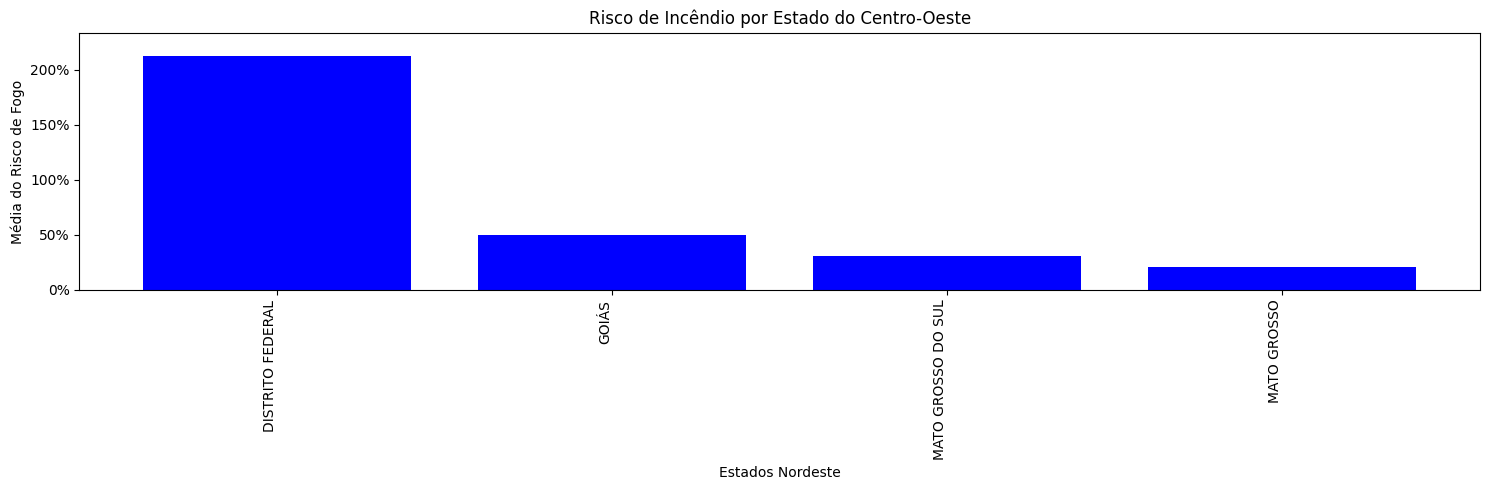

In [57]:
# Calcular a média do risco de fogo por estado
media_risco_estado = centro_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 1

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Centro-Oeste')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, media_risco_estado['risco_fogo'].max() * 1.1)  # Um pouco acima do máximo para espaço

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


TRANSFORMANDO EM GRÁFICOS(NORTE)

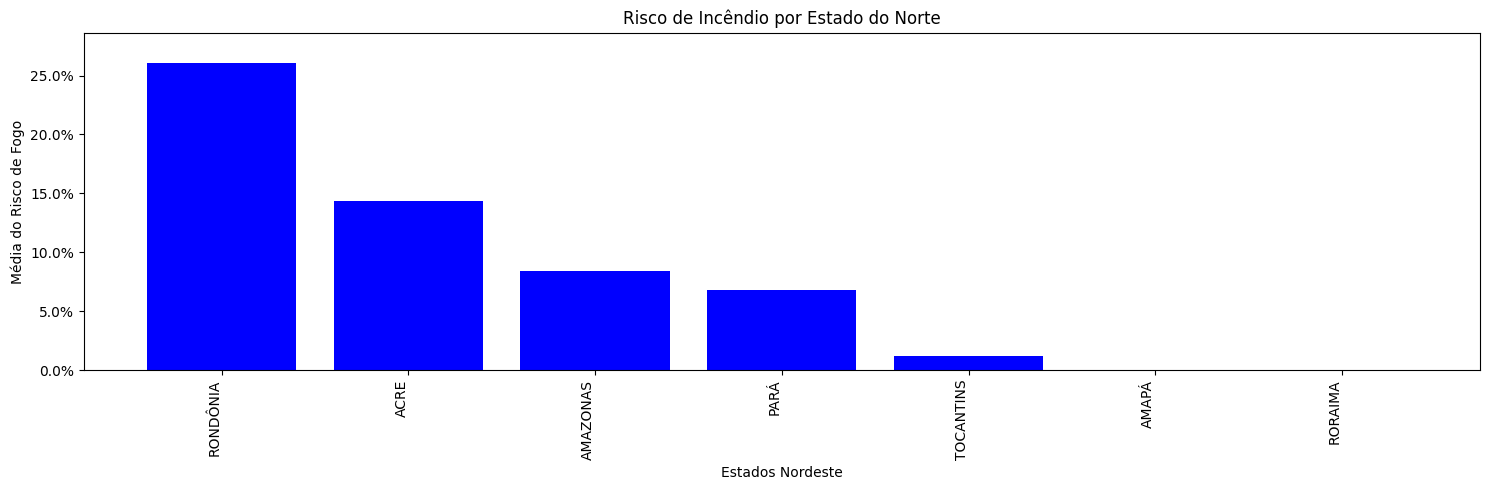

In [59]:
# Calcular a média do risco de fogo por estado
media_risco_estado = norte_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 1

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False).head(10)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Norte')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, media_risco_estado['risco_fogo'].max() * 1.1)  # Um pouco acima do máximo para espaço

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


TRANSFORMANDO EM GRÁFICOS(NORDESTE)

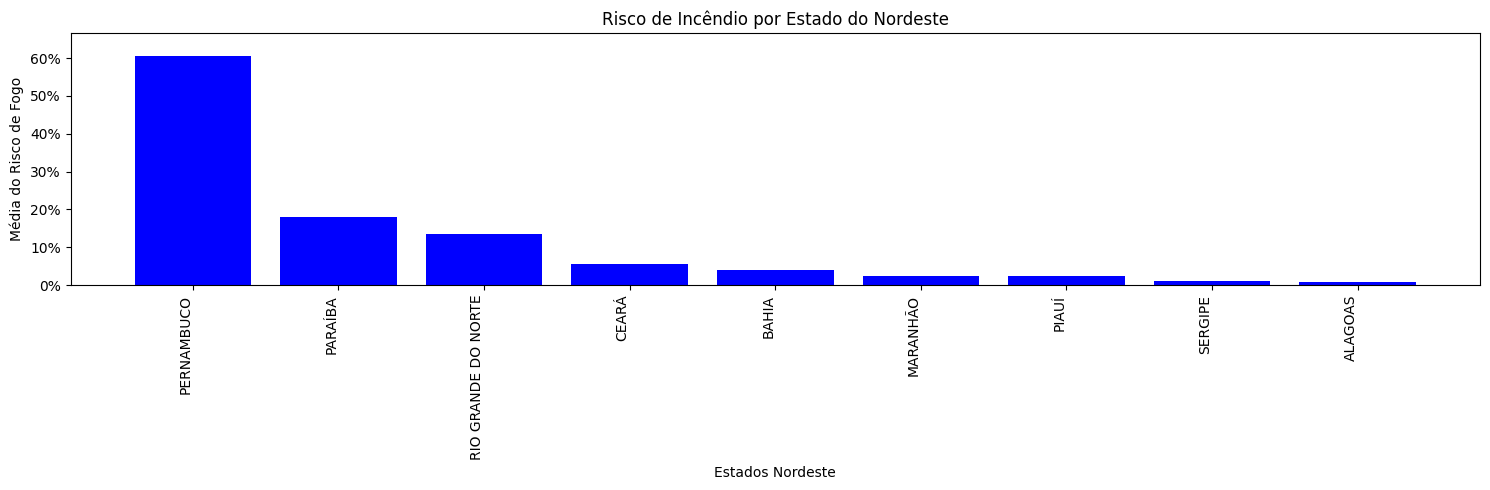

In [60]:
# Calcular a média do risco de fogo por estado
media_risco_estado = nordeste_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 1

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Nordeste')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, media_risco_estado['risco_fogo'].max() * 1.1)  # Um pouco acima do máximo para espaço

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()
